<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: machine learning practice with scikit-learn

---

We are going to use datasets about wine.

There are two datasets; one for white wines, one for red wines.

For information about the dataset look here:

- [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Data description](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)

## Part 2: Classification

For this exercise we'll try and predict whether a wine is red or white based on its details.

#### 1: Read in *both* the white and red wine datasets into two DataFrames

In [7]:
import pandas as pd

df_red = pd.read_csv("data/winequality-red.csv")
df_white = pd.read_csv("data/winequality-white.csv")

#### 2: In both DataFrames create a 'colour' column (with values 'white' and 'red' respectively)

In [8]:
df_white["colour"] = "white"
df_red["colour"] = "red"

#### 3: Create a single dataset by concatenating (hint, hint) them together

In [9]:
df = pd.concat([df_red, df_white])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### 4: Do some exploration of your two classes

You may be interested in questions like:

- what proportion of wines are red vs. white?
- what is the breakdown of our variables by class? (i.e. what does alcohol content, citric acid etc. look like for white vs. red wines?)

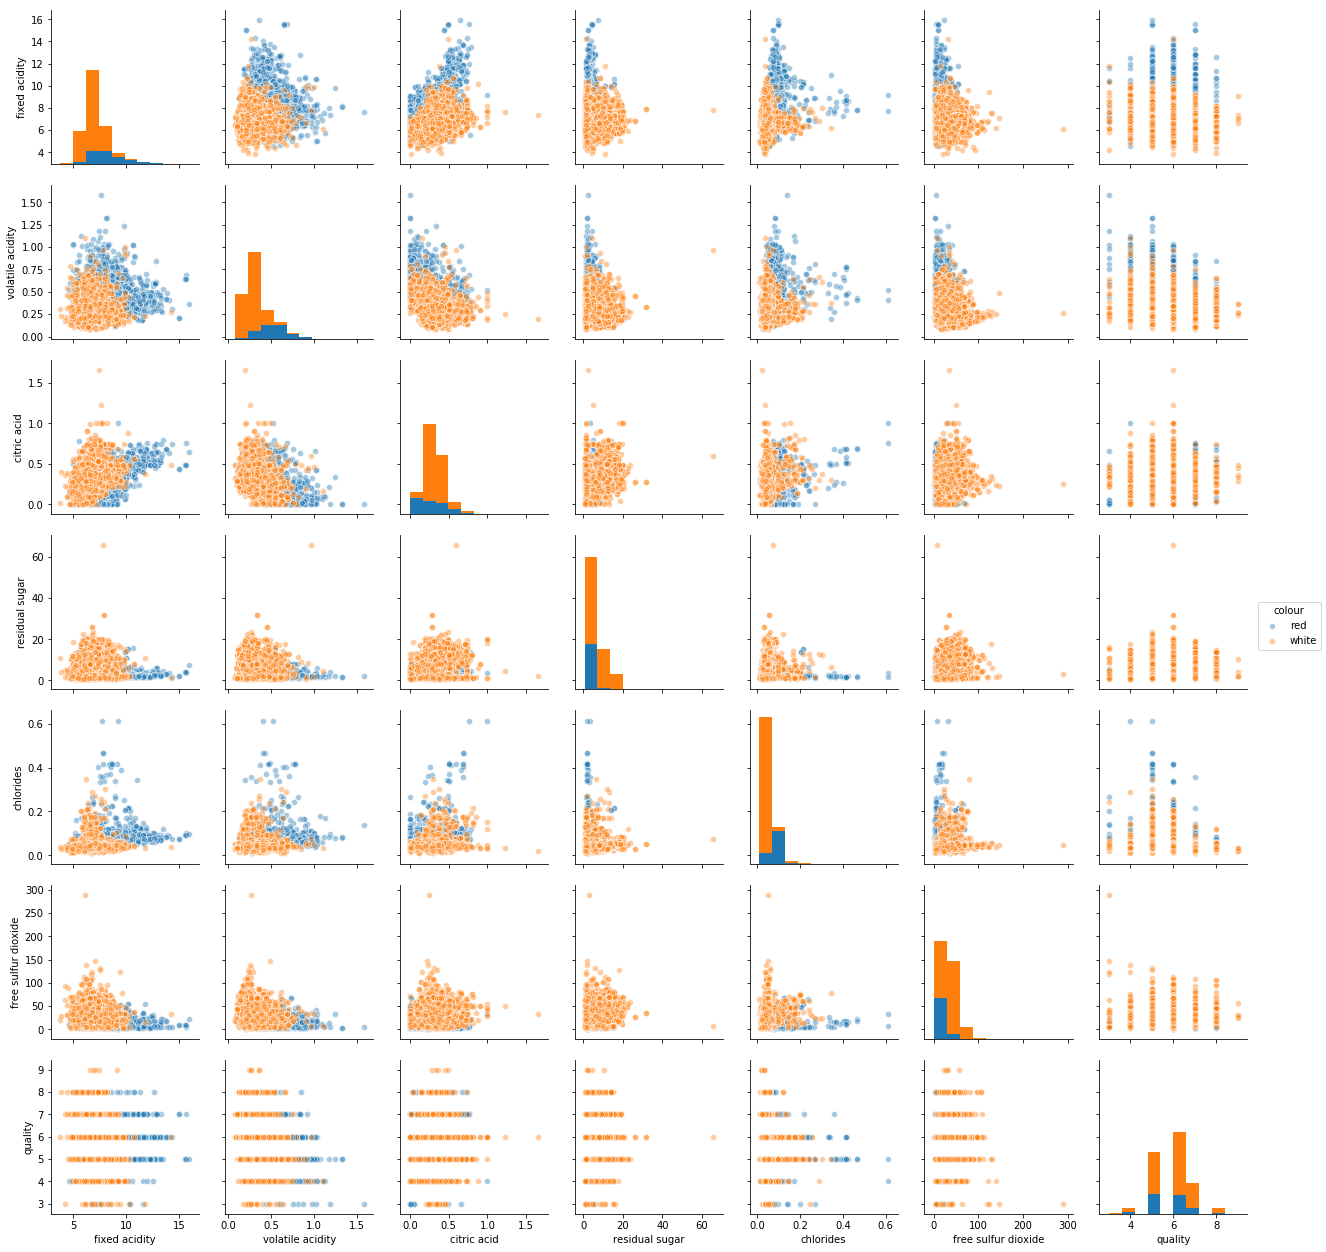

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# too big to plot in a single pair plot, so we'll do two!
sns.pairplot(df[list(df.columns[:6]) + ["quality", "colour"]],
             hue="colour",
             plot_kws={"alpha": 0.4});

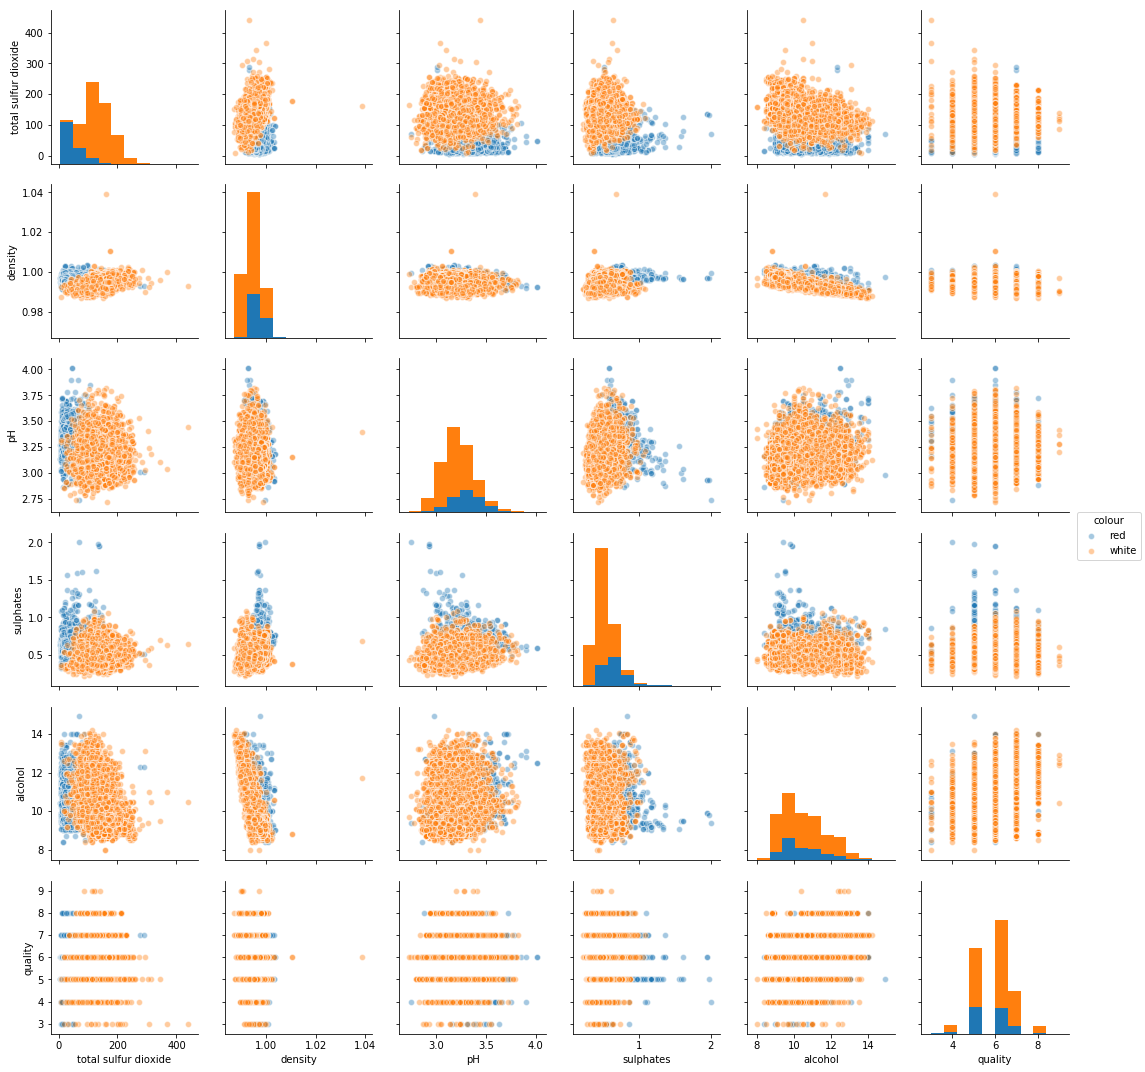

In [25]:
sns.pairplot(df[list(df.columns[6:])],
             hue="colour",
             plot_kws={"alpha": 0.4});

Some columns have more of a separation than others, so we can try and focus on those

#### 5: Take 3-4 of the columns of interest and create a train-test split

Using the make-up of classes investigated above as an indication - should you or shouldn't you stratify your samples in the train-test split?

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df[["fixed acidity", "chlorides", "total sulfur dioxide"]]
y = df["colour"]

# classes have to be binary 0-1 values
y_binary = y.map({"white": 0, "red": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, stratify=y, test_size=0.3, random_state=42)

Classes are imbalanced, stratifying is a good idea

#### 6: Choose to fit either a logistic regression or a KNN classifier. What is the cross-validated accuracy of your chosen classifier?

You might have noticed the classes are skewed - use an appropriate metric for evaluation

In [69]:
import numpy as np
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(knn, X_train, y_train, scoring="f1")
np.mean(accuracy_scores)

0.8485100395302242

#### 7: Use grid search to optimise your model and get the optimal hyperparameter value

- look at the best score of your grid search
- look at the best hyperparameter

In [70]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={"n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17]},
                    cv=10,
                    scoring="f1")

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [71]:
grid.best_score_

0.8599300168485423

In [72]:
grid.best_params_

{'n_neighbors': 13}

#### 8: Use the "best estimator" from your grid search to get predictions on your test set

In [73]:
y_pred = grid.best_estimator_.predict(X_test)

#### 9: Get your model's final test-set "accuracy" (or whichever metric you chose)

In [74]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.8511576626240351


#### 10: Look at your model's confusion matrix to see where it made errors

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1429,   41],
       [  94,  386]])

Because of the imbalanced classes more red wines are predicted as white (because it's easier for the model to predict white, the majority class).